In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

# Data Preparation

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')

#after uploading training and test sets, we apply some transformations: 
#date divided into date and time
#delete HumidityRatio
#remove Light outliers

df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)
df.drop('Unnamed: 0',  axis=1,inplace=True)
df=df[df['Light']<1000] 

In [8]:
df[df['Light']>1000]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time,Date
2458,22.772,25.2900,1380.000000,1202.500000,0.004333,1,09:46:00,2015-02-12
3207,20.700,18.8900,1546.333333,455.333333,0.002845,0,09:42:00,2015-02-07
4053,22.500,24.9175,1021.250000,577.500000,0.004198,1,09:49:00,2015-02-13
5472,22.700,25.5000,1697.250000,951.750000,0.004350,1,09:40:59,2015-02-04
6848,20.745,18.8900,1451.750000,453.000000,0.002853,0,09:42:59,2015-02-07
10498,22.790,25.2900,1581.000000,1211.500000,0.004338,1,09:47:00,2015-02-12
13191,22.600,25.4725,1419.500000,945.000000,0.004319,1,09:40:00,2015-02-04


In [3]:
test=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')

test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)
test.drop('Unnamed: 0',  axis=1,inplace=True)

In [4]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

# Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
attributes =  ['Temperature','CO2','Light','Humidity','HumidityRatio'] 
class_name = 'Occupancy'

X_train = df[attributes].copy()
y_train = df[class_name]

X_test = test[attributes].values
y_test = test[class_name]

In [7]:
X_train.shape

(14384, 5)

# Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9946498054474708
F1-score [0.99652009 0.98843323]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.98      0.99      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



# Variance Threshold

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
df['Temperature'].var()

1.1168984229340386

In [14]:
sel = VarianceThreshold(threshold=(0.1))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(14384, 4)

In [12]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9944876783398184
F1-score [0.99641577 0.98807018]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



# Univariate Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest

In [14]:
sel = SelectKBest(k=4)
X_train_sel = sel.fit_transform(X_train, y_train)
for i in sel.scores_:
    print(i)
    #perche i p-values sono 0.0 ??? 
X_train_sel 

6639.22284085009
4805.424558028975
80040.27128566559
35.15808993011381
1070.1037715388609


array([[2.07000000e+01, 5.87500000e+02, 0.00000000e+00, 3.74615849e-03],
       [1.97900000e+01, 5.24500000e+02, 0.00000000e+00, 5.02842071e-03],
       [2.08900000e+01, 5.57200000e+02, 0.00000000e+00, 3.84577933e-03],
       ...,
       [1.92900000e+01, 4.65500000e+02, 0.00000000e+00, 3.71595805e-03],
       [2.17000000e+01, 8.02250000e+02, 4.33000000e+02, 3.34773227e-03],
       [2.01000000e+01, 5.03000000e+02, 0.00000000e+00, 4.67039692e-03]])

In [15]:
X_train   #mantiene humidity ratio e non humidity 

,Temperature,CO2,Light,Humidity,HumidityRatio
0,20.70,587.50,0.00,24.8400,0.003746
1,19.79,524.50,0.00,35.2000,0.005028
2,20.89,557.20,0.00,25.2000,0.003846
3,22.20,913.00,429.50,24.3340,0.004025
4,22.08,1198.60,544.20,28.3700,0.004663
...,...,...,...,...,...
14386,20.60,508.00,0.00,26.8900,0.004032
14387,21.20,782.00,454.75,25.3925,0.003950
14388,19.29,465.50,0.00,26.8900,0.003716
14389,21.70,802.25,433.00,20.8900,0.003348


In [16]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)
for i in sel.scores_:
    print(i)
    
X_train_sel     #mantiene  temperature e light

6639.22284085009
4805.424558028975
80040.27128566559
35.15808993011381
1070.1037715388609


array([[ 20.7 ,   0.  ],
       [ 19.79,   0.  ],
       [ 20.89,   0.  ],
       ...,
       [ 19.29,   0.  ],
       [ 21.7 , 433.  ],
       [ 20.1 ,   0.  ]])

In [17]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9923800259403373
F1-score [0.99504585 0.98350298]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4747
           1       0.98      0.99      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



# Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
X_train

,Temperature,CO2,Light,Humidity,HumidityRatio
0,20.70,587.50,0.00,24.8400,0.003746
1,19.79,524.50,0.00,35.2000,0.005028
2,20.89,557.20,0.00,25.2000,0.003846
3,22.20,913.00,429.50,24.3340,0.004025
4,22.08,1198.60,544.20,28.3700,0.004663
...,...,...,...,...,...
14386,20.60,508.00,0.00,26.8900,0.004032
14387,21.20,782.00,454.75,25.3925,0.003950
14388,19.29,465.50,0.00,26.8900,0.003716
14389,21.70,802.25,433.00,20.8900,0.003348


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

sel = SelectFromModel(LassoCV())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel

array([[587.5 ,   0.  ],
       [524.5 ,   0.  ],
       [557.2 ,   0.  ],
       ...,
       [465.5 ,   0.  ],
       [802.25, 433.  ],
       [503.  ,   0.  ]])

Obviiously decision tree select Light 
Instead LogisticRegression select temperature

In [21]:
from sklearn.neighbors import KNeighborsClassifier
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9957846952010376
F1-score [0.99726085 0.99085795]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      0.99      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       1.00      1.00      1.00      6168



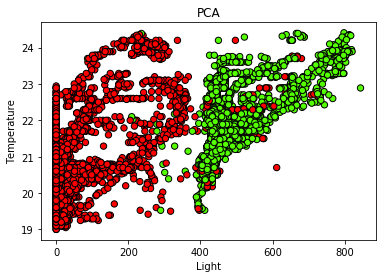

In [22]:
plt.scatter(df['Light'], df['Temperature'], c=y_train, cmap=plt.cm.prism, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("Light")
plt.ylabel("Temperature")
plt.show()

# Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [25]:
X_train_pca.shape

(14384, 2)

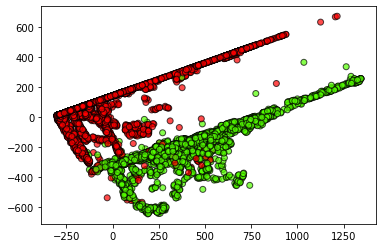

In [26]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [27]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9917315175097277
F1-score [0.99461059 0.98224852]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.97      0.99      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



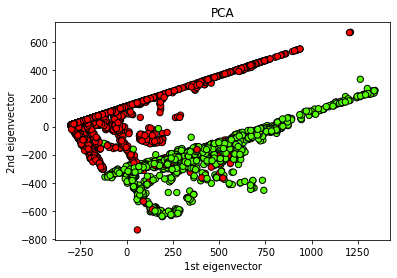

In [28]:

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.prism, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

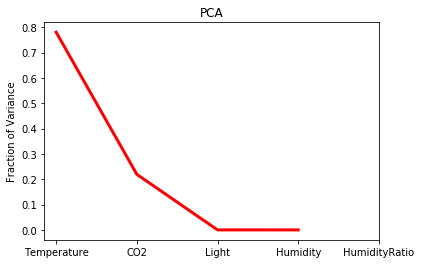

In [29]:
plt.plot(PCA(n_components=4).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(5), attributes)
plt.show()

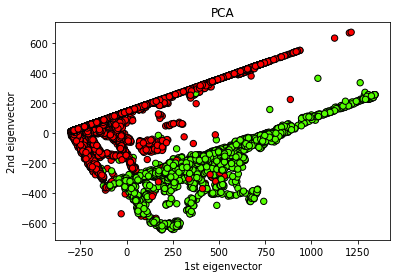

In [30]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

# MORE

Si considera di utilizzare select from model utilizzando il support vecto machine e il random forrest 

In [31]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [32]:

#bhoooooo


clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
X_train_sel = clf.fit(X_train, y_train)
X_train_sel

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=True,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l2',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 RandomF...rue, ccp_alpha=0.0,
      

In [33]:
#s

sel = SelectFromModel(LinearSVC())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[20.7 ],
       [19.79],
       [20.89],
       ...,
       [19.29],
       [21.7 ],
       [20.1 ]])

In [34]:
from sklearn.neighbors import KNeighborsClassifier
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8613813229571985
F1-score [0.90991466 0.69947276]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4747
           1       0.70      0.70      0.70      1421

    accuracy                           0.86      6168
   macro avg       0.80      0.80      0.80      6168
weighted avg       0.86      0.86      0.86      6168



In [35]:


sel = SelectFromModel(RandomForestClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel

array([[ 20.7 ,   0.  ],
       [ 19.79,   0.  ],
       [ 20.89,   0.  ],
       ...,
       [ 19.29,   0.  ],
       [ 21.7 , 433.  ],
       [ 20.1 ,   0.  ]])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.995136186770428
F1-score [0.99683744 0.98947368]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      0.99      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       1.00      1.00      1.00      6168



# Tabella da capire 

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py



Il codice è copiato dal link sopra, cercare di capire perche pvalues( le robe arancioni) sono uguali a 0 

Sono riportati sotto log10 

altra cosa per cambiare il numero di attributi da selezionare, modificare k
( ce ne sono due, modificare entrambe poichè devono essere uguali)

Classification accuracy without selecting features: 0.989
Classification accuracy after univariate feature selection: 0.987


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


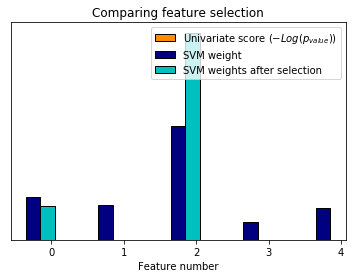

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset


plt.figure(1)
plt.clf()

X_indices = np.arange(X_train.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=2), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [38]:
X_train

,Temperature,CO2,Light,Humidity,HumidityRatio
0,20.70,587.50,0.00,24.8400,0.003746
1,19.79,524.50,0.00,35.2000,0.005028
2,20.89,557.20,0.00,25.2000,0.003846
3,22.20,913.00,429.50,24.3340,0.004025
4,22.08,1198.60,544.20,28.3700,0.004663
...,...,...,...,...,...
14386,20.60,508.00,0.00,26.8900,0.004032
14387,21.20,782.00,454.75,25.3925,0.003950
14388,19.29,465.50,0.00,26.8900,0.003716
14389,21.70,802.25,433.00,20.8900,0.003348


In [39]:
print(X_train.corr())

               Temperature       CO2     Light  Humidity  HumidityRatio
Temperature       1.000000  0.447363  0.696222 -0.153118       0.210332
CO2               0.447363  1.000000  0.445441  0.305280       0.482450
Light             0.696222  0.445441  1.000000 -0.026569       0.229627
Humidity         -0.153118  0.305280 -0.026569  1.000000       0.932268
HumidityRatio     0.210332  0.482450  0.229627  0.932268       1.000000


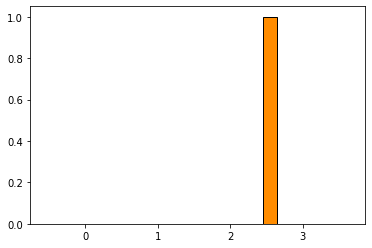

In [40]:
# Import some data to play with

# The iris dataset


plt.figure(1)
plt.clf()

X_indices = np.arange(X_train.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = selector.pvalues_
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')


plt.show()

## ESEMPIO DI SCIKIT LEARN

Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


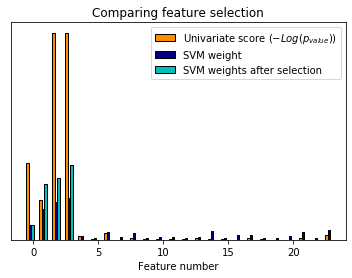

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


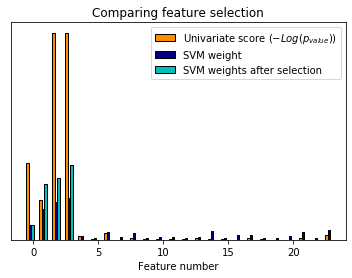

In [42]:
plt.figure(1)
plt.clf()

X_indices = np.arange(X_train.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()